# 3.1 Classification with a single-layer perceptron

In [1]:
import numpy as np

### 3.1.1 Generation of linearly-separable data

In [2]:
n = 100

mA = [10, 10]
sigma = 1

aX = np.random.normal(mA[0], sigma, n)
aY = np.random.normal(mA[1], sigma, n)

In [3]:
a = np.stack((aX, aY, np.ones(n), np.zeros(n)), axis=1)

In [4]:
mB = [5, 5]
sigma = 1

bX = np.random.normal(mB[0], sigma, n)
bY = np.random.normal(mB[1], sigma, n)

In [5]:
b = np.stack((bX, bY, np.ones(n), np.ones(n)), axis=1)
b.shape

(100, 4)

In [7]:
dataset = np.concatenate((a, b), axis=0)
dataset.shape()

In [8]:
np.random.shuffle(dataset)

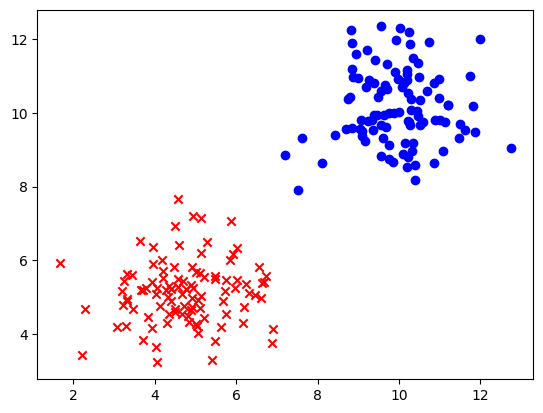

In [9]:
import matplotlib.pyplot as plt
plt.scatter(a[:, 0], a[:, 1], c='b', label='a', marker='o')
plt.scatter(b[:, 0], b[:, 1], c='r', label='b', marker='x')

### 3.1.2 Classification with a single-layer perceptron and analysis

In [10]:
# Functions for Perceptron learning and delta learning rule
# learning rate and epochs are global variables

# Variable dim is used to remove bias...
def perceptron_learning(dataset, weights, batch_size, epochs, learning_rate, dim):
    nb_goods = [0] * epochs
    for i in range(epochs):
        idx = 0
        dataset_size = len(dataset)
        while idx < dataset_size:
            next_idx = idx + batch_size
            if next_idx <= dataset_size:
                y = np.matmul(weights, dataset[idx:next_idx,:dim].transpose()) > 0
                weights = weights - learning_rate * np.matmul((y - dataset[idx:next_idx,dim]), dataset[idx:next_idx,:dim])
            # last batch
            else:
                y = np.matmul(weights, dataset[idx:,:dim].transpose()) > 0
                weights = weights - learning_rate * np.matmul((y - dataset[idx:,dim]), dataset[idx:,:dim])
            idx = next_idx
        nb_goods[i] = sum((np.matmul(weights, dataset[:,:dim].transpose()) > 0) == dataset[:,dim]) / dataset_size
    return weights, nb_goods

# Variable dim is used to remove bias...
def delta_learning(dataset, weights, batch_size, epochs, learning_rate, dim):
    nb_goods = [0] * epochs
    for i in range(epochs):
        idx = 0
        dataset_size = len(dataset)
        while idx < dataset_size:
            next_idx = idx + batch_size
            if next_idx <= dataset_size:
                y = np.matmul(weights, dataset[idx:next_idx,:dim].transpose())
                weights = weights - learning_rate * np.matmul((y - dataset[idx:next_idx,dim]), dataset[idx:next_idx,:dim])
            # last batch
            else:
                y = np.matmul(weights, dataset[idx:,:dim].transpose())
                weights = weights - learning_rate * np.matmul((y - dataset[idx:,dim]), dataset[idx:,:dim])
            idx = next_idx
        nb_goods[i] = sum((2*((np.matmul(weights, dataset[:,:dim].transpose()) > 0) - 0.5)) == dataset[:,dim]) / dataset_size
    return weights, nb_goods


In [21]:
weights_pl = np.random.rand(3)
print((weights_pl.shape))
type((np.sum(3 * weights_pl@dataset[:,:3].T)))

(3,)


numpy.float64

In [ ]:
# Question 1 : Apply and compare perceptron learning with the delta learning rule in
# online (sequential) mode on the generated dataset. Adjust the learning
# rate and study the convergence of the two algorithms.

learning_rate = 0.0001
epochs = 1000
batch_size = 1

for _ in range(3):
    weights_pl = np.random.rand(3)
    weights_dlr = np.copy(weights_pl)
    xmin = min(dataset[:,0])
    xmax = max(dataset[:,0])
    x = np.linspace(xmin, xmax, 20)
    x_curve = list(range(epochs))
    
    ### Plot of dataset
    plt.scatter(a[:, 0], a[:, 1], c='b', marker='o', label='_nolegend_')
    plt.scatter(b[:, 0], b[:, 1], c='r', marker='x', label='_nolegend_')

    ### Perceptron learning
    weights_pl, y_curve_perceptron = perceptron_learning(dataset, weights_pl, batch_size, epochs, learning_rate, dim=3)
    y = (-weights_pl[2] - weights_pl[0] * x) / weights_pl[1]

    plt.plot()
    plt.plot(x, y, c='grey', linestyle='--', label='perceptron')

    ### Delta learning rule

    # ground truth in {-1, 1}
    dataset_symetric = np.copy(dataset)
    dataset_symetric[:,3] = 2 * (dataset_symetric[:,3] - 0.5)

    weights_dlr, y_curve_delta = delta_learning(dataset_symetric, weights_dlr, batch_size, epochs, learning_rate, dim=3)
    y = (-weights_dlr[2] - weights_dlr[0] * x) / weights_dlr[1]

    plt.plot(x, y, c='black', linestyle='--', label='delt')

    plt.legend(['Perceptron learning rule', 'Delta learning rule'])
    plt.show()

    ### Plot learning curves
    plt.plot(x_curve, y_curve_perceptron, c='grey', label='perceptron')
    plt.plot(x_curve, y_curve_delta, c='black', label='delta')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend(['perceptron learning rule', 'delta learning rule'])
    plt.show()
    
    if y_curve_perceptron[-1] < 1:
        print(f'Perceptron proportion of good classification  : {y_curve_perceptron[-1]}')
    if y_curve_delta[-1] < 1:
        print(f'Delta proportion of good classification :  {y_curve_delta[-1]}')


In [12]:
test = np.copy(a)
test[:, 2] += np.random.normal(0, .1, (100))
test

array([[10.77885137, 10.05270171,  0.95687405,  0.        ],
       [ 9.5274116 , 11.54582429,  0.81819036,  0.        ],
       [10.76872225, 10.01920112,  1.07351347,  0.        ],
       [11.27278686, 10.87868167,  0.97666909,  0.        ],
       [ 9.85076438,  8.693042  ,  0.92537555,  0.        ],
       [ 9.63280894,  8.89214154,  0.91410936,  0.        ],
       [11.15246971,  9.58803679,  1.06859799,  0.        ],
       [ 9.87435137, 10.20228466,  0.78560993,  0.        ],
       [ 9.97207148,  8.58096325,  0.92851213,  0.        ],
       [ 8.65742236,  7.79946926,  1.09578475,  0.        ],
       [10.27572361, 11.40936166,  1.08173805,  0.        ],
       [ 9.17745548,  8.40666967,  1.10121369,  0.        ],
       [ 9.76208442, 10.19778027,  0.92140428,  0.        ],
       [ 9.58608614, 10.26094873,  0.90594635,  0.        ],
       [ 9.14660037, 10.76190977,  0.98350631,  0.        ],
       [ 9.29999427,  9.78411368,  0.9794802 ,  0.        ],
       [ 9.54886838,  8.

In [ ]:
# Test with different batch size for deltat rule

learning_rate = 0.001
epochs = 50

for _ in range(3):
    weights_pl = np.random.rand(3)
    weights_dlr = np.copy(weights_pl)
    xmin = min(dataset[:,0])
    xmax = max(dataset[:,0])
    x = np.linspace(xmin, xmax, 20)
    x_curve = list(range(epochs))

    ### Delta learning rule

    # ground truth in {-1, 1}
    dataset_symetric = np.copy(dataset)
    dataset_symetric[:,3] = 2 * (dataset_symetric[:,3] - 0.5)

    legend = []
    for batch_size, color in [(1, 'black'), (3, 'grey'), (5, 'green'), (10, 'blue')]:
        _, y_curve_delta = delta_learning(dataset_symetric, weights_dlr, batch_size, epochs, learning_rate, dim=3)
        plt.plot(x_curve, y_curve_delta, c=color)
        legend.append(f'batch size : {batch_size}')

    # plt.plot(x_curve, [1]*len(x_curve), color='pink')

    plt.legend(legend)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.show()

In [ ]:
# Removing the bias

learning_rate = 0.001
epochs = 10
batch_size = 1

dataset_no_bias = np.delete(np.copy(dataset), 2, 1)
dataset_symetric_no_bias = np.delete(np.copy(dataset_symetric), 2, 1)

for _ in range(3):
    weights_pl = np.random.rand(2)
    weights_dlr = np.copy(weights_pl)
    xmin = min(dataset[:,0])
    xmax = max(dataset[:,0])
    x = np.linspace(xmin, xmax, 20)
    x_curve = list(range(epochs))
    
    ### Plot of dataset
    plt.scatter(a[:, 0], a[:, 1], c='b', label='a', marker='o')
    plt.scatter(b[:, 0], b[:, 1], c='r', label='b', marker='x')

    ### Perceptron learning
    weights_pl, y_curve_perceptron = perceptron_learning(dataset_no_bias, weights_pl, batch_size, epochs, learning_rate, dim=2)
    y = ( - weights_pl[0] * x) / weights_pl[1]

    plt.plot()
    plt.plot(x, y, c='grey', linestyle='--')

    ### Delta learning rule

    weights_dlr, y_curve_delta = delta_learning(dataset_symetric_no_bias, weights_dlr, batch_size, epochs, learning_rate, dim=2)
    y = ( - weights_dlr[0] * x) / weights_dlr[1]

    plt.plot(x, y, c='black', linestyle='--')
    plt.show()

    ### Plot learning curves
    plt.plot(x_curve, y_curve_perceptron, c='grey')
    plt.plot(x_curve, y_curve_delta, c='black')
    plt.show()
    
    if y_curve_perceptron[-1] < 1:
        print(f'Perceptron proportion of good classification  : {y_curve_perceptron[-1]}')
    if y_curve_delta[-1] < 1:
        print(f'Delta proportion of good classification :  {y_curve_delta[-1]}')
    
    print(weights_dlr)
